<h1 align='center' style='color:blue'>Sumit Sah: Credit Risk Modeling Project</h1>

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x : '{:.2f}'.format(x))
np.set_printoptions(suppress = True)

## Load Datasets

In [2]:
df_customers = pd.read_csv("datasets/customers.csv")
df_loans = pd.read_csv("datasets/loans.csv")
df_bureau = pd.read_csv("datasets/bureau_data.csv")

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df = pd.merge(df_customers, df_loans, on = "cust_id")
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [7]:
df = pd.merge(df, df_bureau)
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [9]:
df['default'] = df['default'].astype(int)

In [10]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [11]:
X = df.drop(columns = 'default', axis = 'colums')
y = df['default']

### Train Test split
- We perform train test split before doing EDA to prevent data leakage. We don't want test set (which is part of the entire dataset) to influence EDA or any decisions on feature engineering. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

In [13]:
df_train = pd.concat([X_train, y_train], axis = 'columns')
df_test = pd.concat([X_test, y_test], axis = 'columns')

In [14]:
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [15]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [16]:
df.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [17]:
mode_residence = df.residence_type.mode()[0]
df_train.residence_type.fillna(mode_residence, inplace=True)
df_test.residence_type.fillna(mode_residence, inplace=True)

df_train.residence_type.unique(), df_test.residence_type.unique()

(array(['Owned', 'Mortgage', 'Rented'], dtype=object),
 array(['Owned', 'Mortgage', 'Rented'], dtype=object))

In [18]:
df_test.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [19]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [20]:
continuous_columns = [
    'age', 'income', 'number_of_dependants', 'years_at_current_address',
    'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
    'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
    'bank_balance_at_application', 'number_of_open_accounts',
    'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
    'total_dpd', 'enquiry_count', 'credit_utilization_ratio'
]

categorical_columns = [
    'cust_id', 'gender', 'marital_status', 'employment_status',
    'residence_type', 'city', 'state', 'zipcode', 'loan_id',
    'loan_purpose', 'loan_type', 'disbursal_date', 'installment_start_dt',
    'default'
]

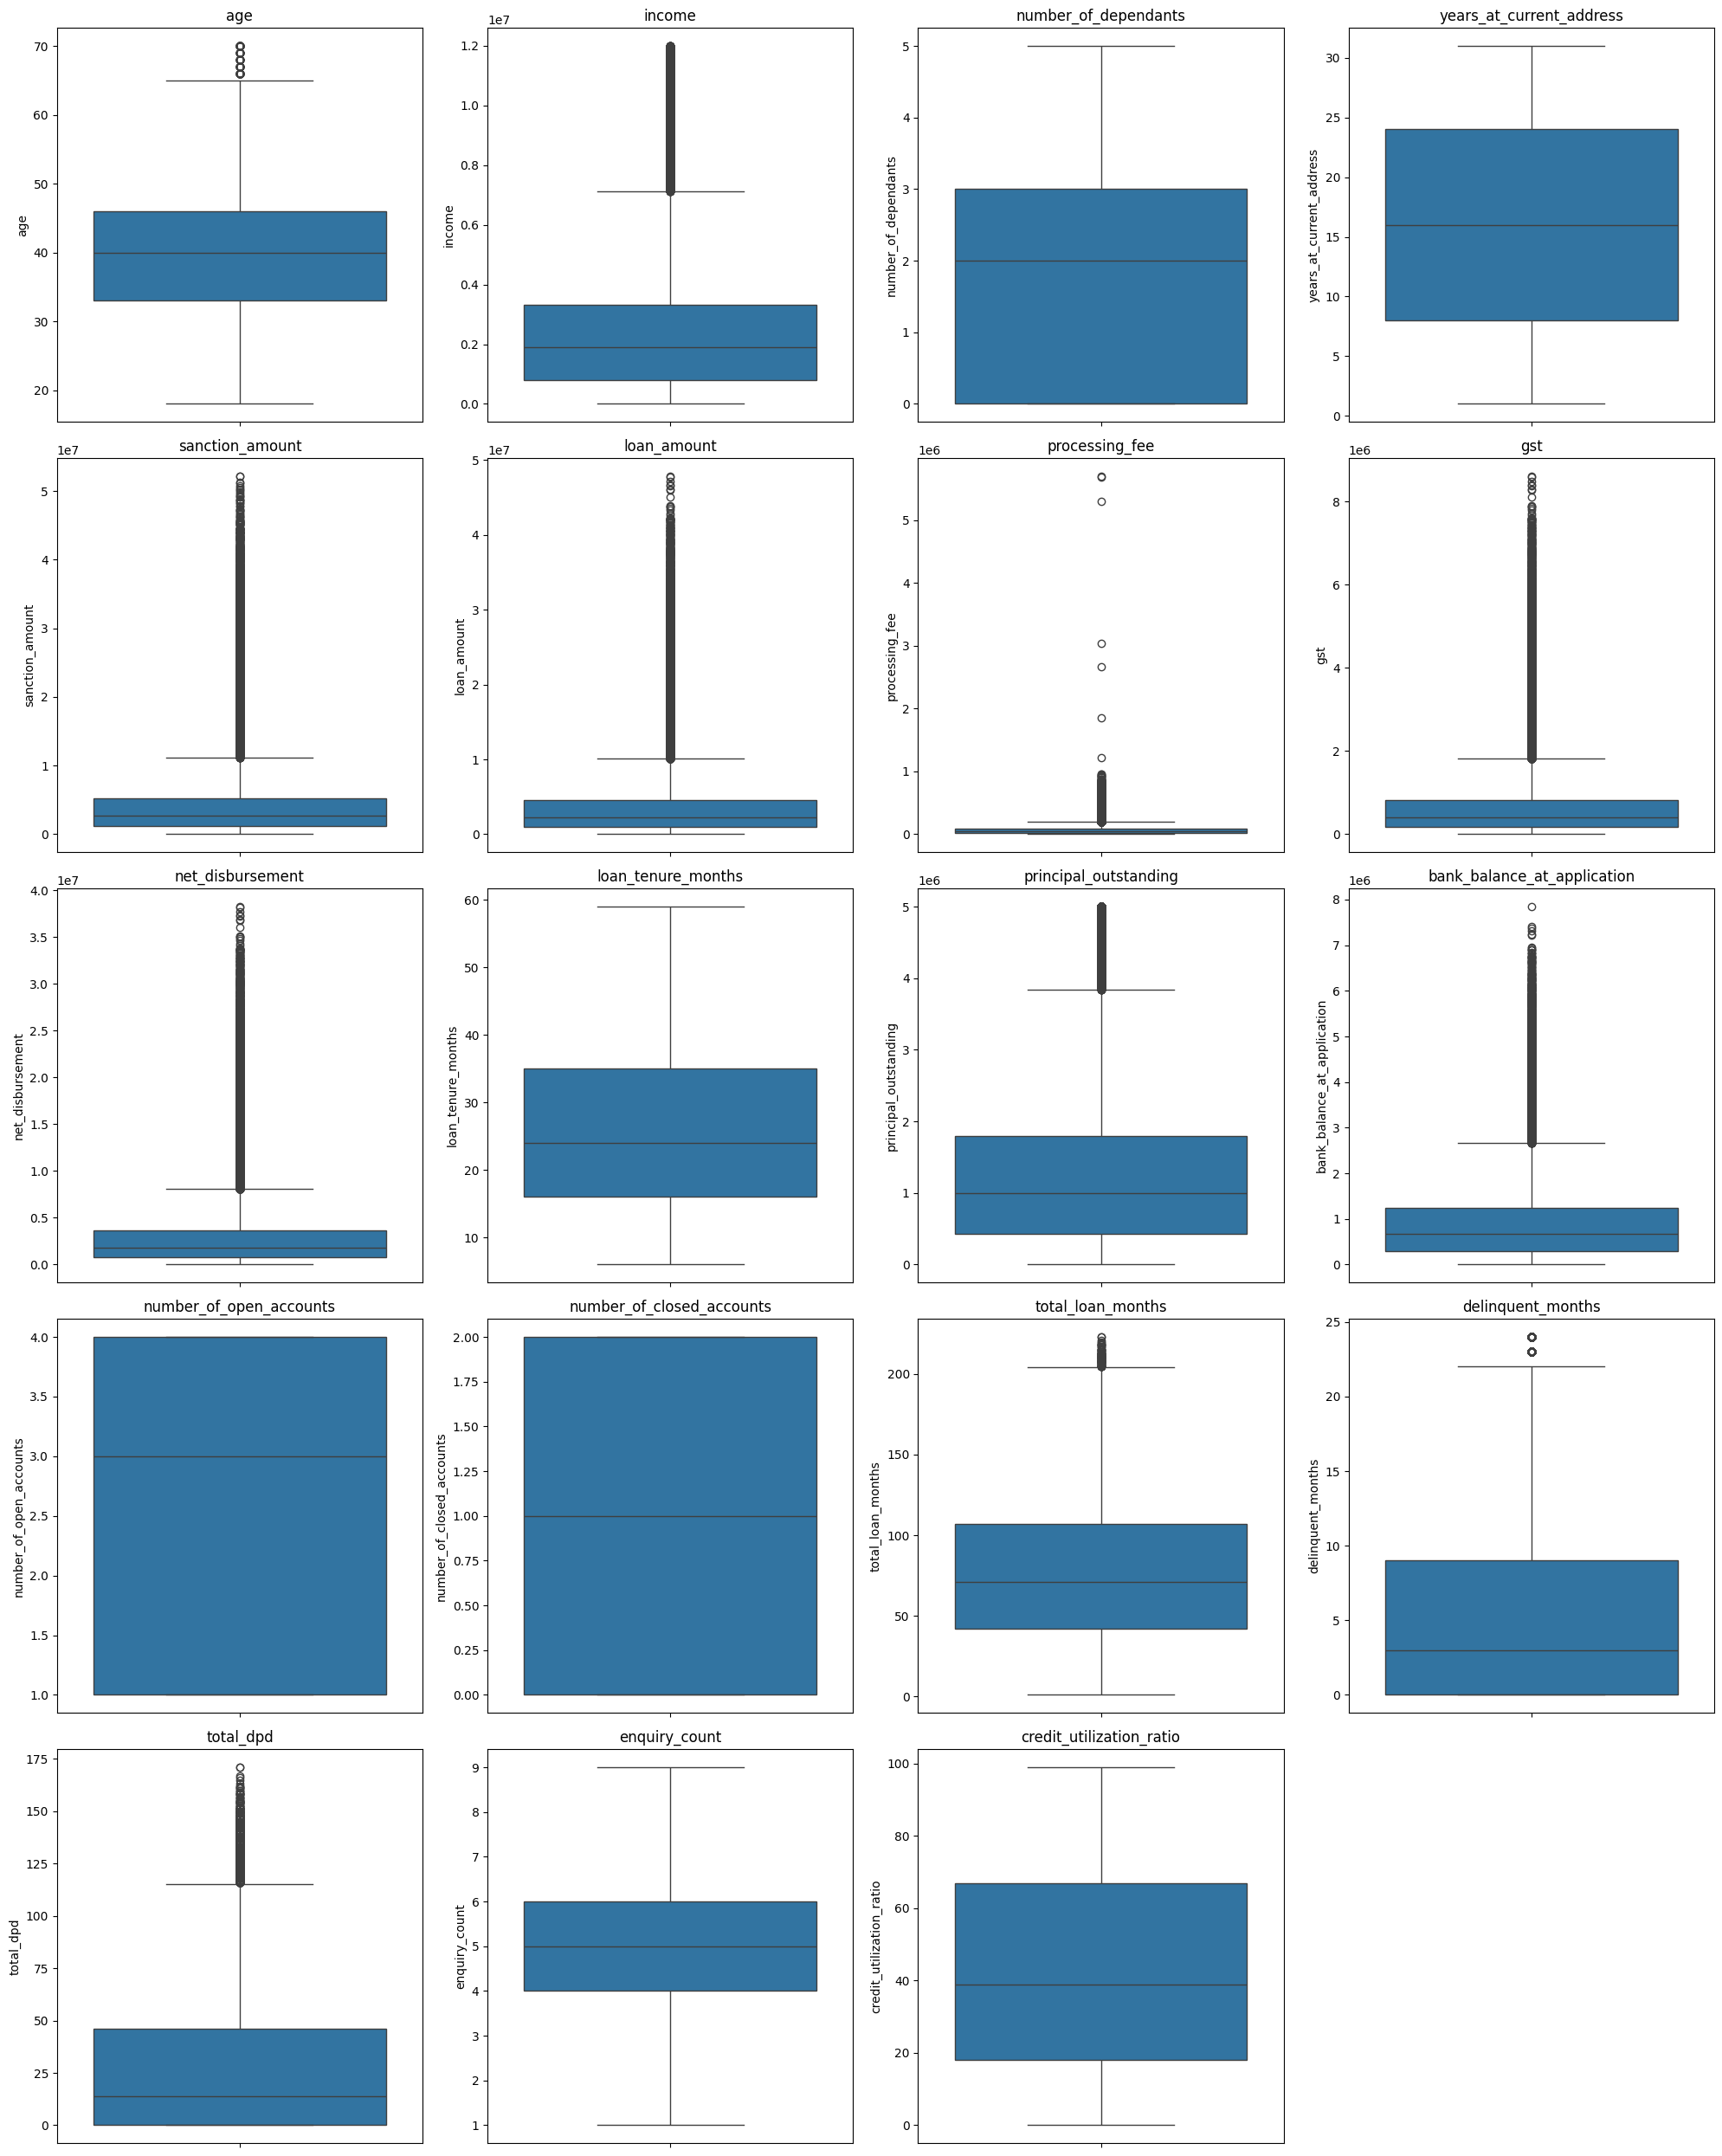

In [21]:
# Create box plots
num_cols = len(continuous_columns)
cols_per_row = 4
rows = (num_cols + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(continuous_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

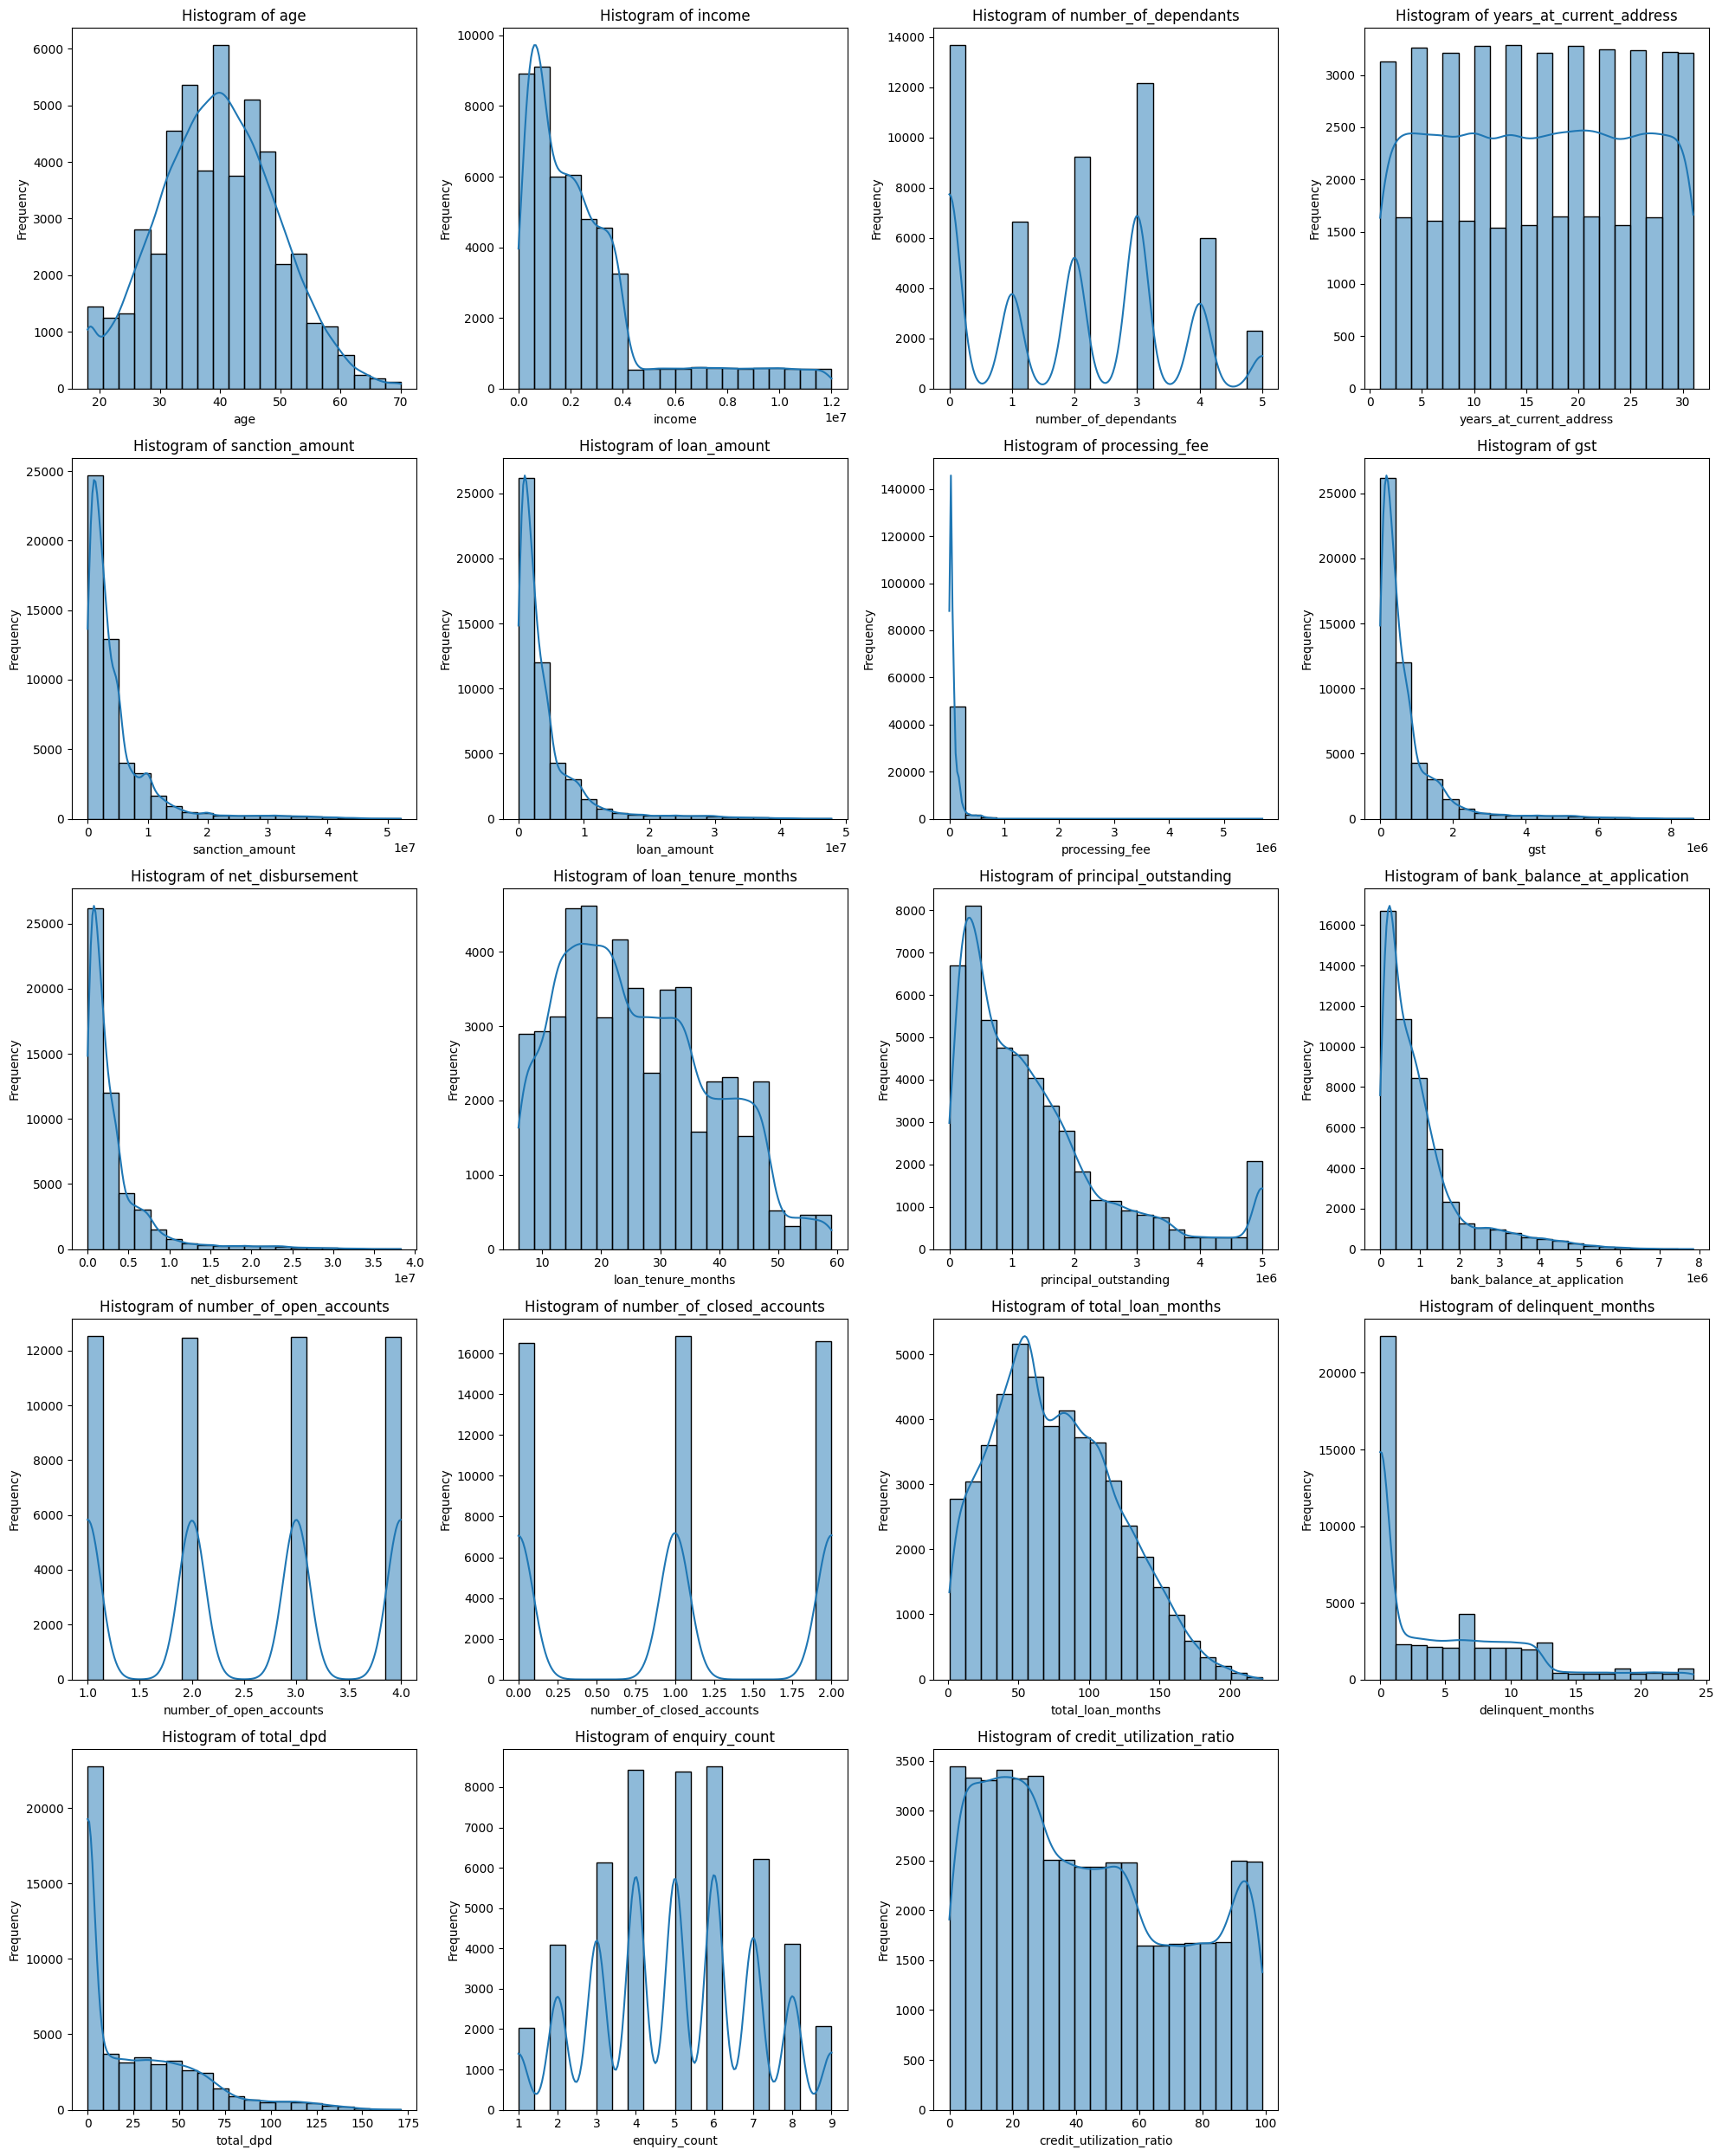

In [22]:
# Plot histogram plots with 4 plots in each row for continuous features
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(continuous_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Outlier Removal Processing Fee

In [23]:
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [24]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [25]:
df_train1 = df_train[(df_train.processing_fee/df_train.loan_amount)<0.03].copy()
df_train1[(df_train1.processing_fee/df_train.loan_amount)>0.03][["loan_amount", "processing_fee"]]
df_train1.shape

(37488, 33)

In [26]:
df_test[(df_test.processing_fee/df_test.loan_amount)<0.03].copy()
df_test.shape

(12500, 33)

In [27]:
df_train1[(df_train1.gst/df_train1.loan_amount)>0.2].shape

(0, 33)

In [28]:
for col in categorical_columns:
    print(col, " : ", df_train1[col].unique())

cust_id  :  ['C12747' 'C32496' 'C43676' ... 'C45237' 'C49229' 'C37785']
gender  :  ['M' 'F']
marital_status  :  ['Married' 'Single']
employment_status  :  ['Self-Employed' 'Salaried']
residence_type  :  ['Owned' 'Mortgage' 'Rented']
city  :  ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state  :  ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode  :  [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_id  :  ['L12747' 'L32496' 'L43676' ... 'L45237' 'L49229' 'L37785']
loan_purpose  :  ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type  :  ['Secured' 'Unsecured']
disbursal_date  :  ['2020-10-31' '2022-10-22' '2023-12-04' ... '2022-02-07' '2019-10-30'
 '2022-10-04']
installment_start_dt  :  ['2020-11-11' '2022-10-27' '2023-12-29' ... '2024-08-19' '2019-07-28'
 '2019-07-25']
default  :  [0 1]


In [29]:
df_train1['loan_purpose'] = df_train1['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'] =  df_test['loan_purpose'].replace('Personaal', 'Personal')
df_train1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

## Exploratory Data Analysis

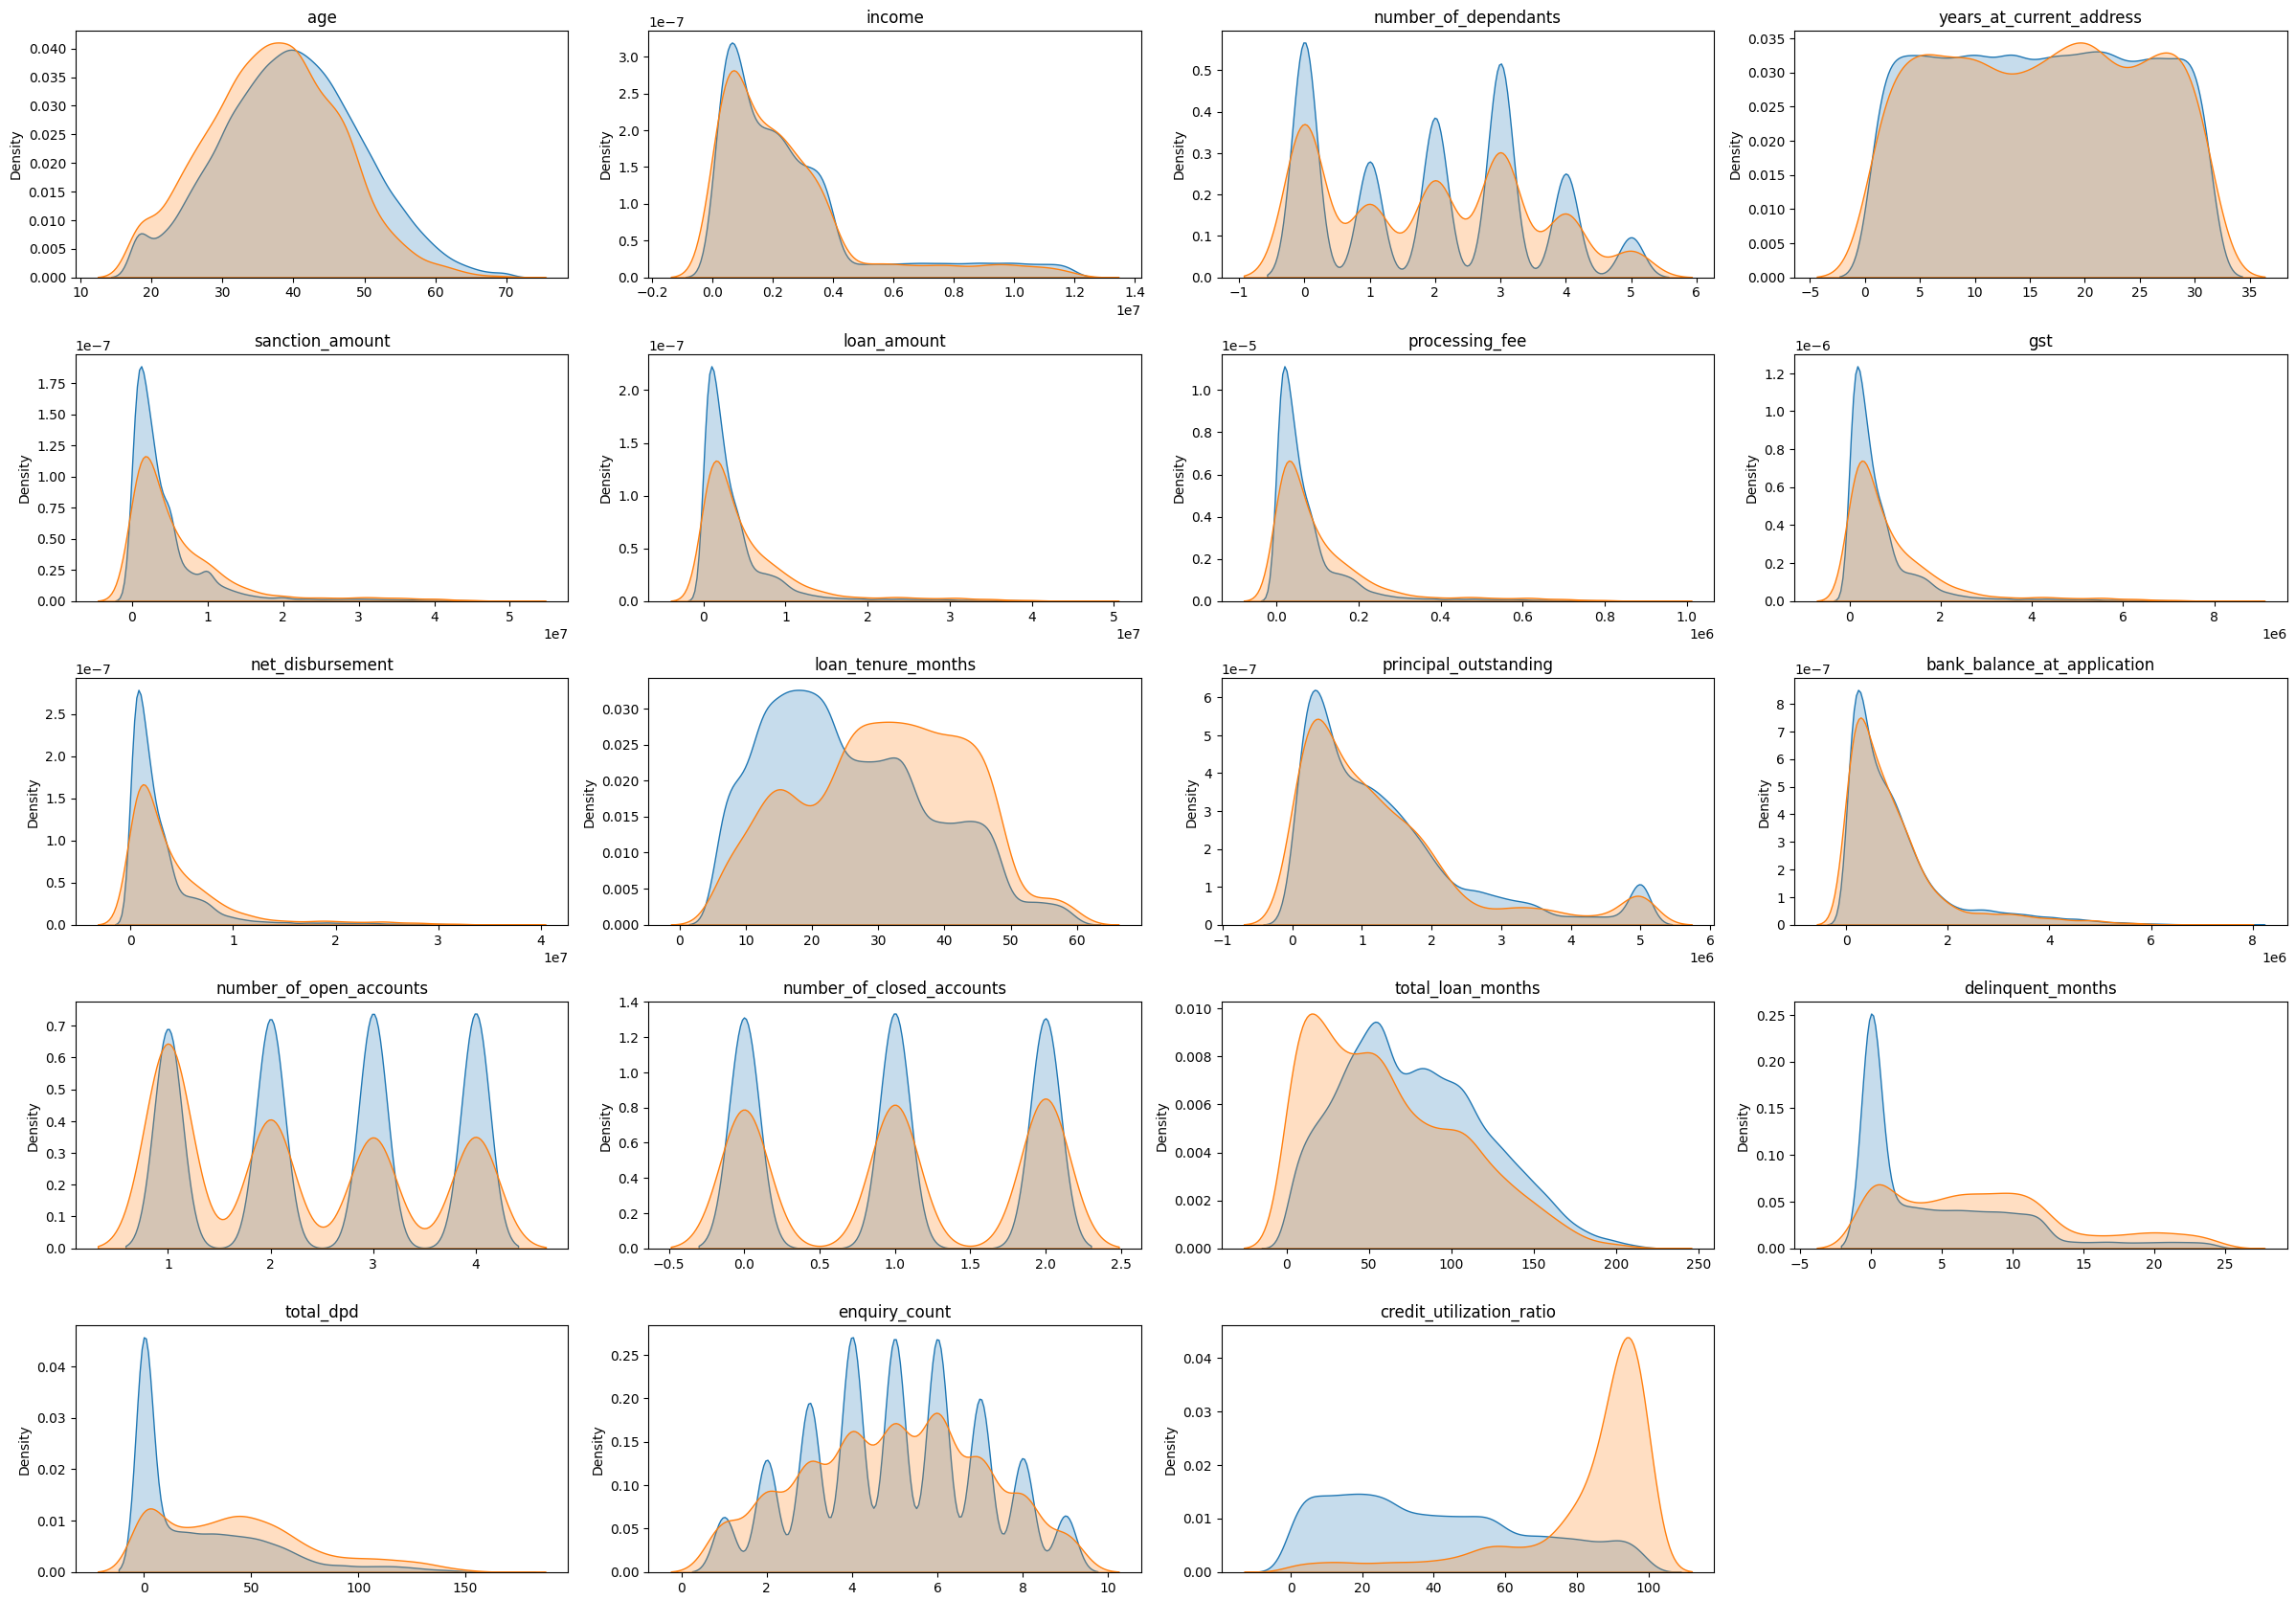

In [30]:
plt.figure(figsize=(24,20))

for i, col in enumerate(continuous_columns):
    plt.subplot(6, 4, i+1)
    sns.kdeplot(df_train1[col][df_train1['default']==0], fill = True, label = 'default=0')
    sns.kdeplot(df_train1[col][df_train1['default']==1], fill = True, label = 'default=1')
    plt.title(col)
    plt.xlabel(' ')
plt.tight_layout()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

<h3 style="color:blue" align="center">Feature Engineering, Feature Selection</h3>

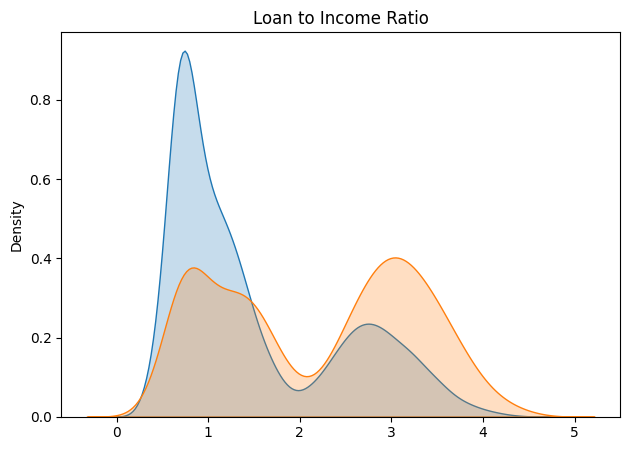

In [31]:
df_train1['loan_to_income'] = round(df_train1["loan_amount"]/df_train1["income"], 2)
df_test['loan_to_income'] = round(df_test["loan_amount"]/df_test["income"], 2)

sns.kdeplot(df_train1['loan_to_income'][df_train1['default']==0], fill = True, label = 'default=0')
sns.kdeplot(df_train1['loan_to_income'][df_train1['default']==1], fill = True, label = 'default=1')
plt.title('Loan to Income Ratio')
plt.xlabel(' ')
plt.tight_layout()
plt.show()

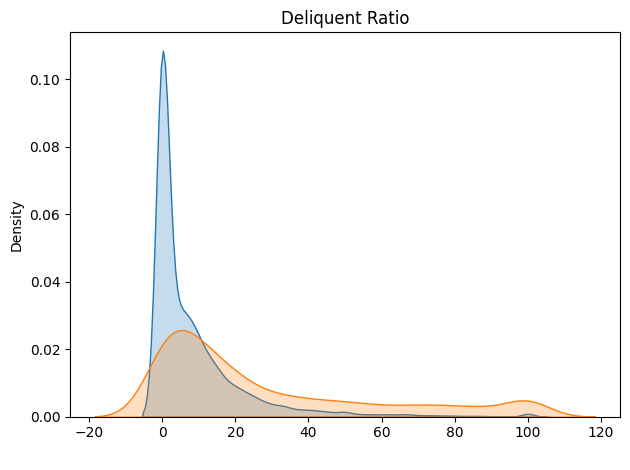

In [32]:
df_train1['delinquent_ratio'] = round(df_train1["delinquent_months"]*100/df_train1["total_loan_months"], 2)
df_test['delinquent_ratio'] = round(df_test["delinquent_months"]*100/df_train1["total_loan_months"], 2)

sns.kdeplot(df_train1['delinquent_ratio'][df_train1['default']==0], fill = True, label = 'default=0')
sns.kdeplot(df_train1['delinquent_ratio'][df_train1['default']==1], fill = True, label = 'default=1')
plt.title('Deliquent Ratio')
plt.xlabel(' ')
plt.tight_layout()
plt.show()

In [33]:
df_train1['avg_dpd_per_delinquency'] = np.where(
    df_train1['delinquent_months'] != 0,
    (df_train1['total_dpd'] / df_train1['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

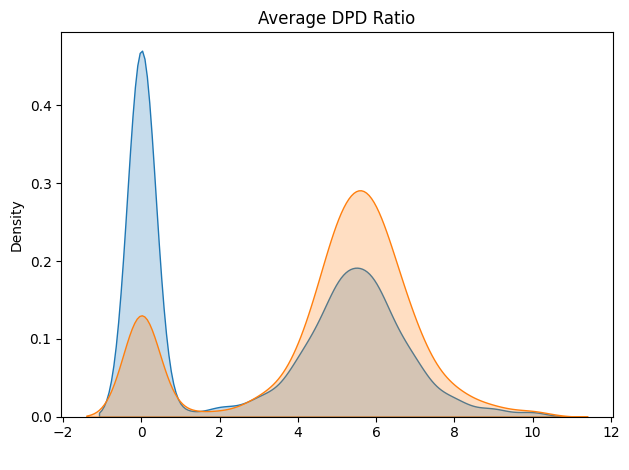

In [34]:
sns.kdeplot(df_train1['avg_dpd_per_delinquency'][df_train1['default']==0], fill = True, label = 'default=0')
sns.kdeplot(df_train1['avg_dpd_per_delinquency'][df_train1['default']==1], fill = True, label = 'default=1')
plt.title('Average DPD Ratio')
plt.xlabel(' ')
plt.tight_layout()
plt.show()

### Feature Selection

In [35]:
df_train2 = df_train1.drop(["cust_id", "loan_id"], axis = 'columns')
df_test = df_test.drop(["cust_id", "loan_id"], axis='columns', errors='ignore')

df_train3 = df_train2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")

df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income',
                        'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")

df_train3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [36]:
df_train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  sanction_amount              37488 non-null  int64  
 13  processing_fee   

In [37]:
# df_train3.select_dtypes(["int64", "float64"]).columns

In [38]:
X_train = df_train3.drop('default', axis='columns')
y_train = df_train3['default']  # Will still fail if 'default' doesn't exist

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = X_train.select_dtypes(["int64", "float64"]).columns
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [39]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']  # Will still fail if 'default' doesn't exist

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
count,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12500.00,12499.00,0.00,12500.00
mean,0.42,0.38,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,NaN,0.33
std,0.19,0.31,0.30,0.29,0.12,0.14,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,NaN,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,NaN,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,NaN,0.44
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,NaN,0.58
max,1.00,1.00,1.00,1.00,0.98,5.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,NaN,1.00


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [41]:
calc_vif(X_train[cols_to_scale])

,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [42]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding']

X_train1 = X_train.drop(features_to_drop_vif, axis="columns")
numeric_cols = X_train1.select_dtypes(['int64', 'float64']).columns
numeric_cols

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [43]:
vif_df = calc_vif(X_train1[numeric_cols])
vif_df

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [44]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_delinquency'], dtype=object)

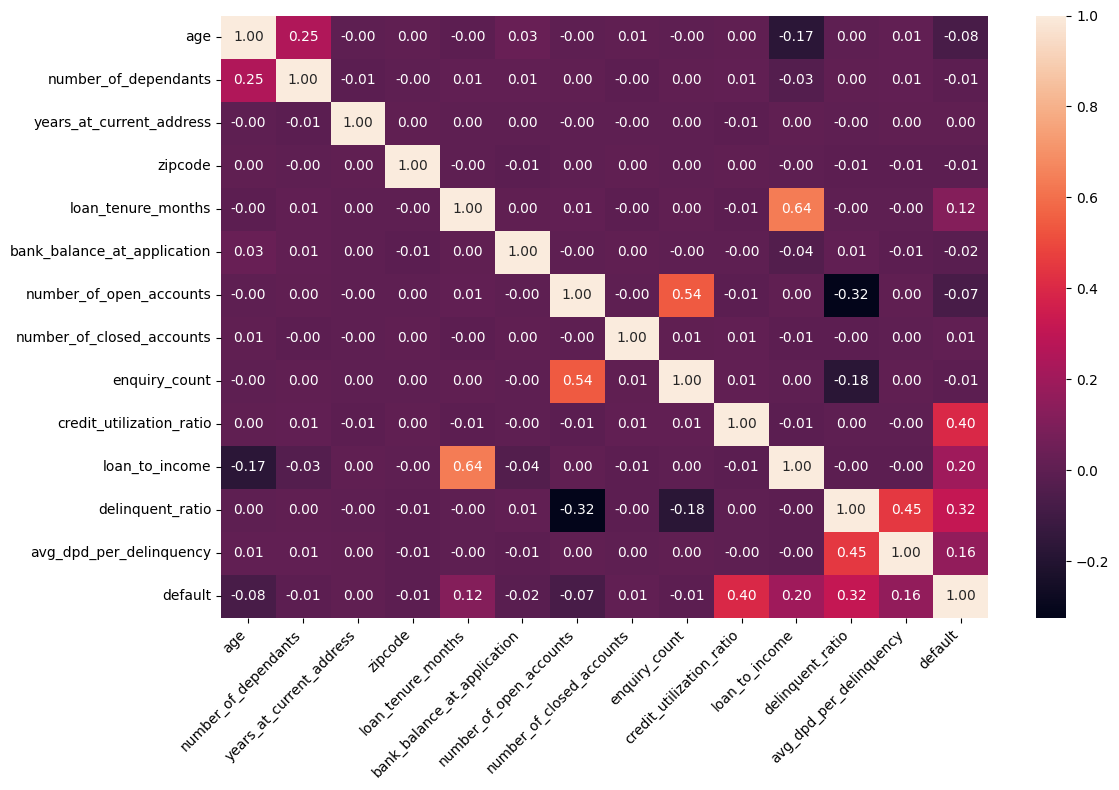

In [45]:
plt.figure(figsize = (12,8))
cm = df_train3[numeric_cols.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot = True, fmt = '0.2f')
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature Engineering Part 2(Categorical Columns)

In [46]:
temp = pd.concat([X_train1, y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count', 'sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [47]:
def calc_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'Total', 'sum':'Good'})
    grouped['Bad'] = grouped['Total'] - grouped['Good']
    total_good = grouped['Good'].sum()
    total_bad = grouped['Bad'].sum()
    grouped['Good Ratio'] = grouped['Good']/total_good
    grouped['Bad Ratio'] = grouped['Bad']/total_bad
    grouped['WOE'] = np.log(grouped['Good Ratio']/grouped['Bad Ratio'])
    grouped['IV'] = grouped['WOE']*(grouped['Good Ratio'] - grouped['Bad Ratio'])
    grouped['WOE'] = grouped['WOE'].replace([np.inf, -np.inf], 0)
    grouped['IV'] = grouped['IV'].replace([np.inf, -np.inf], 0)
    total_iv = grouped['IV'].sum()
    return grouped, total_iv
df_woe_iv, total_iv = calc_woe_iv(temp, 'loan_purpose', 'default')
df_woe_iv

,Total,Good,Bad,Good Ratio,Bad Ratio,WOE,IV
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [48]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  float64
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  float64
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  float64
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  float64
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  loan_tenure_months           37488 non-null  float64
 13  bank_balance_at_a

In [54]:
iv_vals = {}

for feature in X_train1.columns:
    if X_train1[feature].dtype == 'object':
        _, iv = calc_woe_iv(pd.concat([X_train1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train1[feature], bins=10, labels=False)
        _, iv = calc_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_vals[feature] = iv
        
iv_vals

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income': np.float64(0.47641

In [55]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_vals_df = pd.DataFrame(list(iv_vals.items()), columns = ['Features', 'IV Values'])
iv_vals_df = iv_vals_df.sort_values(by='IV Values', ascending=False)
iv_vals_df

,Features,IV Values
17,credit_utilization_ratio,2.353
19,delinquent_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [56]:
selected_features_iv = [feature for feature, iv in iv_vals.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_ratio',
 'avg_dpd_per_delinquency']

In [57]:
X_train_reduced = X_train1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [58]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
12746,0.788,Owned,Home,Secured,0.415,1.000,0.364,0.415,0.132,0.590
32495,0.500,Owned,Education,Secured,0.830,0.667,0.051,0.307,0.062,0.620
43675,0.385,Mortgage,Home,Secured,0.491,0.000,0.000,0.759,0.222,0.560
9040,0.462,Mortgage,Education,Secured,0.642,0.667,0.879,0.194,0.000,0.000
13077,0.769,Owned,Personal,Unsecured,0.170,0.000,0.717,0.047,0.000,0.000


In [59]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first = True)
X_test_encoded =  pd.get_dummies(X_test_reduced, drop_first = True)

In [60]:
X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False
9040,0.462,0.642,0.667,0.879,0.194,0.000,0.000,False,False,True,False,False,False
13077,0.769,0.170,0.000,0.717,0.047,0.000,0.000,True,False,False,False,True,True


## Model Training

# Attept 1
 - Logistic, RandomForest & XGB
 - No handling of class imbalance

In [67]:
X_train_encoded['delinquent_ratio'] = X_train_encoded['delinquent_ratio'].fillna(0)
X_train_encoded['loan_to_income'] = X_train_encoded['loan_to_income'].fillna(0)

X_test_encoded['delinquent_ratio'] = X_test_encoded['delinquent_ratio'].fillna(0)
X_test_encoded['loan_to_income'] = X_test_encoded['loan_to_income'].fillna(0)
X_test.isnull().sum()

age                                0
gender                             0
marital_status                     0
employment_status                  0
number_of_dependants               0
residence_type                     0
years_at_current_address           0
city                               0
state                              0
zipcode                            0
loan_purpose                       0
loan_type                          0
sanction_amount                    0
processing_fee                     0
gst                                0
net_disbursement                   0
loan_tenure_months                 0
principal_outstanding              0
bank_balance_at_application        0
number_of_open_accounts            0
number_of_closed_accounts          0
enquiry_count                      0
credit_utilization_ratio           0
loan_to_income                     1
delinquent_ratio               12500
avg_dpd_per_delinquency            0
dtype: int64

In [68]:
X_train_encoded.isnull().sum()

age                         0
loan_tenure_months          0
number_of_open_accounts     0
credit_utilization_ratio    0
loan_to_income              0
delinquent_ratio            0
avg_dpd_per_delinquency     0
residence_type_Owned        0
residence_type_Rented       0
loan_purpose_Education      0
loan_purpose_Home           0
loan_purpose_Personal       0
loan_type_Unsecured         0
dtype: int64

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

In [70]:
log_model = LogisticRegression()
log_model.fit(X_train_encoded, y_train)

log_y_pred = log_model.predict(X_test_encoded)
report = classification_report(y_test, log_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11426
           1       0.93      0.36      0.52      1074

    accuracy                           0.94     12500
   macro avg       0.94      0.68      0.75     12500
weighted avg       0.94      0.94      0.93     12500



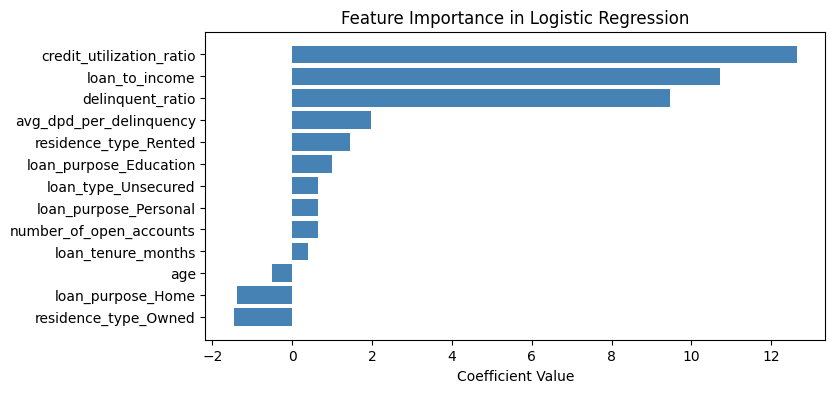

In [71]:
feature_importance = log_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [72]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_encoded, y_train)

rf_y_pred = rf_model.predict(X_test_encoded)
report = classification_report(y_test, rf_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11426
           1       0.90      0.39      0.54      1074

    accuracy                           0.94     12500
   macro avg       0.92      0.69      0.76     12500
weighted avg       0.94      0.94      0.93     12500



In [73]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     11426
           1       0.87      0.39      0.54      1074

    accuracy                           0.94     12500
   macro avg       0.91      0.69      0.75     12500
weighted avg       0.94      0.94      0.93     12500



In [74]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'newton-cg', 'C': np.float64(545.5594781168514)}
Best Score: 0.7579612918377666
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11426
           1       0.91      0.38      0.53      1074

    accuracy                           0.94     12500
   macro avg       0.93      0.69      0.75     12500
weighted avg       0.94      0.94      0.93     12500



In [75]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss'
)
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_encoded, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7895728146092874
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11426
           1       0.84      0.51      0.63      1074

    accuracy                           0.95     12500
   macro avg       0.90      0.75      0.80     12500
weighted avg       0.95      0.95      0.94     12500



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [77]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

AttributeError: 'RandomUnderSampler' object has no attribute '_check_n_features'

In [78]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

NameError: name 'X_train_res' is not defined

In [ ]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)